In [1]:
!pip install -U scikit-learn seaborn

In [2]:
import sklearn
from sklearn import preprocessing

In [3]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
le = preprocessing.LabelEncoder()
l = ["PaperlessBilling", "gender", "Partner", "Contract", "StreamingMovies", "InternetService", "SeniorCitizen", "TechSupport", "Churn"]
for k in l:
    df[k] = le.fit_transform(df[k])


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,No,No phone service,0,No,...,No,0,No,0,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,No,34,Yes,No,0,Yes,...,Yes,0,No,0,1,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,No,2,Yes,No,0,Yes,...,No,0,No,0,0,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,No,45,No,No phone service,0,Yes,...,Yes,2,No,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,No,2,Yes,No,1,No,...,No,0,No,0,0,1,Electronic check,70.70,151.65,1


In [7]:
df['TotalCharges'].str.replace('.', ',')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df = df[df['TotalCharges'].notna()]

In [8]:
# encode Total Charges as binary treatment
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
df["HighCharges"] = 0
df.HighCharges = df.TotalCharges.apply(lambda x: 0 if x <= 5800 else 1)
df.HighCharges.value_counts()

HighCharges
0    6250
1     782
Name: count, dtype: int64

# Correlational AI model

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
feature_cols = ["HighCharges","PaperlessBilling","gender","Partner","Contract","StreamingMovies", "InternetService","SeniorCitizen","TechSupport"]

In [12]:
X = df[feature_cols] # Features
y = df.Churn # Target variable

In [13]:
import statsmodels.api as sm
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7022
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3230.9
Date:                Fri, 08 Mar 2024   Deviance:                       6461.8
Time:                        17:57:37   Pearson chi2:                 7.29e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2127
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6282      0.084     -7.520      0.000      -0.792      -0.464
HighCharges          0.0658      0.140      0.470      0.638      -0.208       0.340
PaperlessBilling     0.6167      0.067      9.164      0.000       0.485       0.749
gender              -0.0394      0.061     -0.648      0.517      -0.159       0.080
Partner             -0.2625      0.064     -4.087      0.000      -0.388      -0.137
Contract            -1.4660      0.067    -21.721      0.000      -1.598      -1.334
StreamingMovies      0.1586      0.035      4.521      0.000       0.090       0.227
InternetService     -0.0174      0.047     -0.367      0.714      -0.110       0.075
SeniorCitizen        0.3872      0.077      5.055      0.000       0.237       0.537
TechSupport         -0.3947      0.041     -9.702      0.000      -0.474      -0.315
====================================================================================
"""

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [15]:
model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [16]:
print(model.coef_)

[[ 0.14088004  0.56782594 -0.07415438 -0.29930477 -1.44563992  0.15866388
  -0.04842598  0.33691696 -0.40378934]]


In [17]:
y_pred = model.predict(X_test)

In [18]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1160,  122],
       [ 315,  161]])

Text(0.5, 427.9555555555555, 'Predicted label')

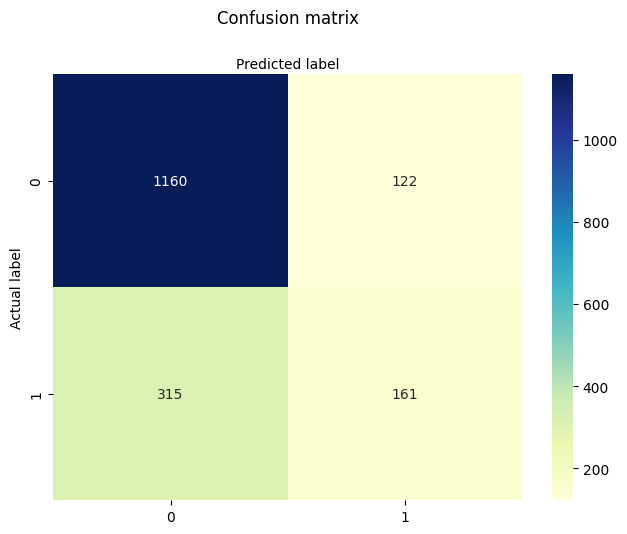

In [19]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import classification_report
target_names = ['no_churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no_churn       0.79      0.90      0.84      1282
       churn       0.57      0.34      0.42       476

    accuracy                           0.75      1758
   macro avg       0.68      0.62      0.63      1758
weighted avg       0.73      0.75      0.73      1758



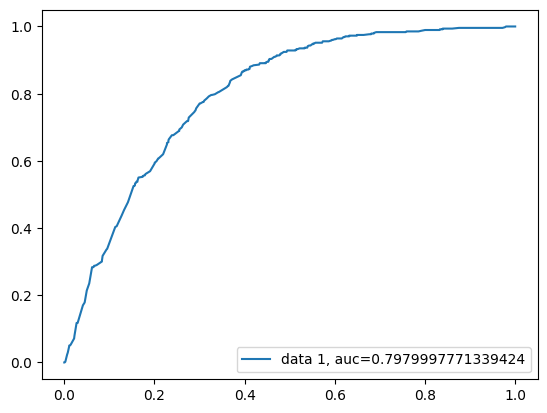

In [21]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# CausalAI model

In [22]:
import dowhy
from dowhy import CausalModel

In [23]:
# I. Create a causal model from the data and given graph.
causal_graph = """
digraph {
Churn;
HighCharges;
PaperlessBilling;
gender;
Partner
Contract;
StreamingMovies;
InternetService;
SeniorCitizen;
TechSupport;
TechSupport -> Churn; HighCharges -> Churn; PaperlessBilling -> Churn;
gender -> HighCharges; Partner -> HighCharges; Contract -> HighCharges;
Contract -> PaperlessBilling; 
StreamingMovies -> Contract; InternetService -> Contract; 
SeniorCitizen -> StreamingMovies; SeniorCitizen -> InternetService;SeniorCitizen -> TechSupport;
}


"""

In [24]:
import sys
if sys.maxunicode == 0x10FFFF:
    print ('Python built with UCS4 (wide unicode) support')
else:
    print ('Python built with UCS2 (narrow unicode) support')


Python built with UCS4 (wide unicode) support


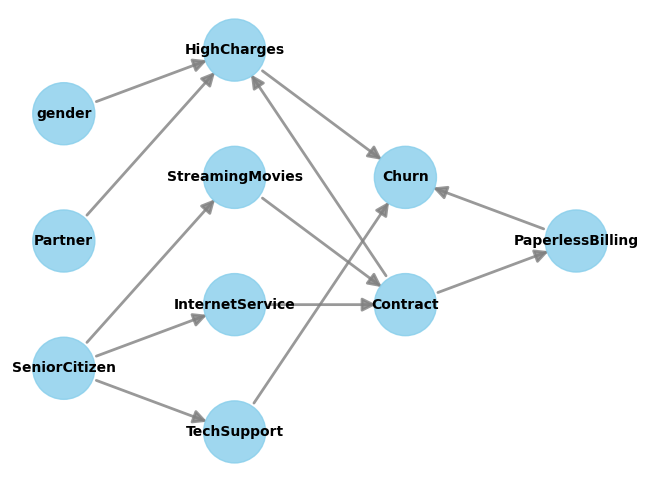

In [25]:
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='HighCharges',
        outcome='Churn')
model.view_model()
#from IPython.display import Image, display
#display(Image(filename="causal_model.png"))

In [26]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                          
──────────────(E[Churn|Contract])
d[HighCharges]                   
Estimand assumption 1, Unconfoundedness: If U→{HighCharges} and U→Churn then P(Churn|HighCharges,Contract,U) = P(Churn|HighCharges,Contract)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                             -1⎤
 ⎢        d                 ⎛        d                        ⎞  ⎥
E⎢──────────────────(Churn)⋅⎜──────────────────([HighCharges])⎟  ⎥
 ⎣d[Partner  gender]        ⎝d[Partner  gender]               ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Churn then ¬(U →→{Partner,gender})
Estimand assumption 2, Exclusion: If we remove {Partner,gender}→{HighCharges}, then ¬({Partner,gender}→Churn)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [27]:
# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                          
──────────────(E[Churn|Contract])
d[HighCharges]                   
Estimand assumption 1, Unconfoundedness: If U→{HighCharges} and U→Churn then P(Churn|HighCharges,Contract,U) = P(Churn|HighCharges,Contract)

## Realized estimand
b: Churn~HighCharges+Contract
Target units: ate

## Estimate
Mean value: -0.07558807777325952



In [28]:
# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:-0.07558807777325952
New effect:-0.0755880777732595
p value:1.0



In [29]:
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="data_subset_refuter")
print(refute_results)

Refute: Use a subset of data
Estimated effect:-0.07558807777325952
New effect:-0.07468308009649989
p value:0.8



In [30]:
refutel = model.refute_estimate(identified_estimand,estimate, "placebo_treatment_refuter")
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:-0.07558807777325952
New effect:0.11066689840673866
p value:0.0

